In [72]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [38]:
# import the data set
data_set = pd.read_csv("Copy of sonar data.csv", header = None)
data_set


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [74]:
# HOW TO ADD THE HEADER TO A DATASET IF NO COLUMN NAMES HAS BEEN PROVIDED
data_set[[1,2,3,4,5]] # when there is no columns name provided to the dataset
headerlist = ["one", "two", "three", "four", "five"]
data_set[[1,2,3,4,5]].to_csv("SONARDATA_CSV", header = headerlist, index = False)
data_set2 = pd.read_csv("SONARDATA_CSV")
print(data_set2.head(50))

       one     two   three    four    five
0   0.0371  0.0428  0.0207  0.0954  0.0986
1   0.0523  0.0843  0.0689  0.1183  0.2583
2   0.0582  0.1099  0.1083  0.0974  0.2280
3   0.0171  0.0623  0.0205  0.0205  0.0368
4   0.0666  0.0481  0.0394  0.0590  0.0649
5   0.0453  0.0277  0.0174  0.0384  0.0990
6   0.0956  0.1321  0.1408  0.1674  0.1710
7   0.0548  0.0842  0.0319  0.1158  0.0922
8   0.0375  0.0484  0.0475  0.0647  0.0591
9   0.0173  0.0347  0.0070  0.0187  0.0671
10  0.0063  0.0152  0.0336  0.0310  0.0284
11  0.0309  0.0169  0.0313  0.0358  0.0102
12  0.0086  0.0055  0.0250  0.0344  0.0546
13  0.0062  0.0253  0.0489  0.1197  0.1589
14  0.0433  0.0604  0.0449  0.0597  0.0355
15  0.0615  0.0650  0.0921  0.1615  0.2294
16  0.0116  0.0191  0.0469  0.0737  0.1185
17  0.0607  0.0378  0.0774  0.1388  0.0809
18  0.0092  0.0145  0.0278  0.0412  0.0757
19  0.0149  0.0641  0.1732  0.2565  0.2559
20  0.0509  0.0819  0.1252  0.1783  0.3070
21  0.0575  0.0842  0.0372  0.0458  0.0771
22  0.0484 

In [40]:
list(data_set.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [41]:
data_set.to_csv("sonar_data", index = False)

In [42]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [43]:
data_set.shape

(208, 61)

In [44]:
data_set.describe()        # provides statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [46]:
data_set[60].value_counts()     # from a column to count the number of occurance

M    111
R     97
Name: 60, dtype: int64

In [47]:
data_set.groupby(60).mean()      # provide mean of all columns 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


<AxesSubplot: xlabel='one', ylabel='three'>

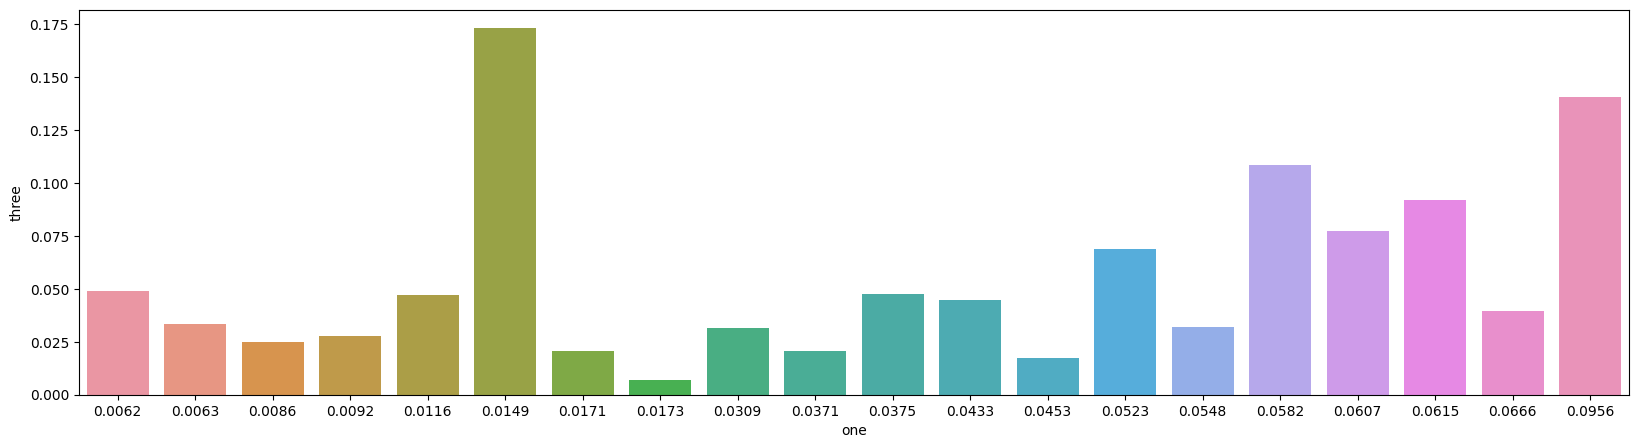

In [80]:
plot = plt.figure(figsize= (20,5))
sb.barplot(x = 'one', y = 'three', data = data_set2.head(20))

In [49]:
# seperating data and labels    SD = sonar data , SL = sonar label
SD = data_set.drop(columns = 60, axis = 1) # axis = 1 when we are dropping a column, axis = 0 for row
SL = data_set[60]
print(SD)
print(SL)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [50]:
# DIVIDING INTO TRAINING AND SPLIT DATA
SD_train, SD_test, SL_train, SL_test = train_test_split(SD, SL, test_size = 0.1, stratify = SL, random_state=2)
print(SD.shape, SD_train.shape, SD_test.shape)

(208, 60) (187, 60) (21, 60)


In [51]:
print(SD_train)
print(SD_test)


         0       1       2       3       4       5       6       7       8   \
113  0.0283  0.0599  0.0656  0.0229  0.0839  0.1673  0.1154  0.1098  0.1370   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
116  0.0094  0.0333  0.0306  0.0376  0.1296  0.1795  0.1909  0.1692  0.1870   
171  0.0179  0.0136  0.0408  0.0633  0.0596  0.0808  0.2090  0.3465  0.5276   
64   0.0071  0.0103  0.0135  0.0494  0.0253  0.0806  0.0701  0.0738  0.0117   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
85   0.0365  0.1632  0.1636  0.1421  0.1130  0.1306  0.2112  0.2268  0.2992   
132  0.0968  0.0821  0.0629  0.0608  0.0617  0.1207  0.0944  0.4223  0.5744   
164  0.0163  0.0198  0.0202  0.0386  0.0752  0.1444  0.1487  0.1484  0.2442   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
37   0.0333  0.0221  0.0270  0.0481  0.0679  0.0981  0.0843  0.1172  0.0759   

         9   ...      50      51      52      53   

In [52]:
type(SD_test)
SD_test.to_csv("sample data test", index = False)

In [53]:
# MODEL TRAINING BASED ON LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(SD_train, SL_train)


LogisticRegression()

In [54]:
# checking the accuracy of the trained model
SD_train_prediction = model.predict(SD_train)
training_data_accuracy = accuracy_score(SD_train_prediction, SL_train)
print('The accuracy of the model on trained data: ',training_data_accuracy)

The accuracy of the model on trained data:  0.8128342245989305


In [55]:
SD_test_prediction = model.predict(SD_test)
test_data_accuracy = accuracy_score(SD_test_prediction, SL_test)
print('The accuracy of the model on test data: ',test_data_accuracy)

The accuracy of the model on test data:  0.9047619047619048


In [56]:
input_data = (0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,0.1442,0.0948,0.0618,0.1641,0.0708,0.0844,0.259,0.2679,0.3094,0.4678,0.5958,0.7245,0.8773,0.9214,0.9282,0.9942,1.0,0.9071,0.8545,0.7293,0.6499,0.6071,0.5588,0.5967,0.6275,0.5459,0.4786,0.3965,0.2087,0.1651,0.1836,0.0652,0.0758,0.0486,0.0353,0.0297,0.0241,0.0379,0.0119,0.0073,0.0051,0.0034,0.0129,0.01,0.0044,0.0057,0.003,0.0035,0.0021,0.0027)
# converting the input data as a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshaping the input data
reshaping_input_data = input_data_as_numpy_array.reshape(1, -1)
# predicting the input data
predicting_input_data = model.predict(reshaping_input_data)  # gives the values as M or R
if predicting_input_data[0] == 'R':
    print("The object is a Rock")
else:
    print("The object is a Mine")



The object is a Rock
